In [1]:
# only adjust settings in this cell
state = 'NC'
root_name = 'Wake'     # which county will root our district (or county_cluster==multi-district)?
k = 14                 # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 4               # size=1 for single district, size=2 for double district, ...
obj_type = 'polsby_popper' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.json'

from cluster import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a multi-district (county cluster) of size =",G._size)

State has total of k = 14 districts
We seek a multi-district (county cluster) of size = 4


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 745670
Single district upper population limit U = 745671


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Wake County to be the root. In our graph, this is vertex # 39


In [6]:
from cluster import enumerate_top_districts
districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=10 )

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 793 rows, 935 columns and 4107 nonzeros
Model fingerprint: 0x4b0af7d0
Model has 1 quadratic constraint
Variable types: 491 continuous, 444 integer (444 binary)
Coefficient statistics:
  Matrix range     [7e-04, 1e+06]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+06]
Presolve removed 109 rows and 107 columns
Presolve time: 0.01s
Presolved: 684 rows, 828 columns, 3668 nonzeros
Presolved model has 1 quadratic constraint(s)
Variable types: 485 continuous, 

 1549829 830727    3.40386   46   48          -    2.77839      -  23.1  330s
 1568717 840443    4.22528   46   10          -    2.78183      -  23.1  335s
found [0, 2, 8, 11, 12, 21, 22, 24, 26, 31, 39, 40, 42, 45, 47, 51, 57, 60, 64, 68, 69, 75, 79, 82, 90, 91, 96, 98] with objective = 3.6167043799639127
   added to list!
 1587349 850057    4.09728   45   68          -    2.78538      -  23.1  340s
 1607063 860099    2.92497   33   12          -    2.78913      -  23.1  345s
 1625544 869791    6.02580   60   15          -    2.79245      -  23.1  350s
found [0, 2, 11, 12, 16, 21, 22, 26, 36, 39, 44, 51, 57, 60, 64, 65, 82, 88, 90, 91, 93, 98] with objective = 8.941456955712328
   replaced worse solution with objective = 12.504955505650006
adding cut saying that objective should be less than 8.941456955712328
 1645285 879357 infeasible   53               -    2.79612      -  23.1  355s
 1665261 889462    3.54331   39   78          -    2.80022      -  23.1  360s
 1685556 899382 infeas

 2634299 1300050    3.57780   39    8          -    3.01531      -  23.2  635s
 2651044 1306101 infeasible   46               -    3.01925      -  23.2  640s
 2667849 1311826    3.15223   47    6          -    3.02325      -  23.2  645s
 2683444 1317642    4.33313   37   79          -    3.02671      -  23.2  650s
found [0, 1, 2, 18, 19, 21, 22, 24, 26, 30, 36, 39, 41, 42, 45, 47, 55, 60, 64, 69, 77, 92, 94, 98] with objective = 4.094377255928348
   replaced worse solution with objective = 4.520774322313197
adding cut saying that objective should be less than 4.473045136857303
 2699354 1322961 infeasible   37               -    3.03041      -  23.1  655s
 2712331 1327713    4.10187   35   10          -    3.03333      -  23.1  660s
 2728080 1332985 infeasible   42               -    3.03686      -  23.1  665s
 2743877 1338133 infeasible   39               -    3.04070      -  23.1  670s
 2760774 1343766    4.28364   36   68          -    3.04441      -  23.1  675s
 2777516 1349342    4

 3990675 1648888    3.57350   55    8          -    3.31361      -  22.5 1080s
 4005793 1648936    3.58034   46   10          -    3.31801      -  22.5 1085s
 4019348 1649474    3.68038   52    8          -    3.32165      -  22.5 1090s
 4034779 1649884    3.46375   33   57          -    3.32563      -  22.5 1095s
 4049029 1650090    3.41832   44   65          -    3.32940      -  22.5 1100s
 4063082 1650760    3.40540   36   36          -    3.33314      -  22.5 1105s
 4076618 1651213    3.44384   40   16          -    3.33654      -  22.5 1110s
 4091921 1651910    3.50996   37   38          -    3.34040      -  22.5 1115s
 4106185 1651869 infeasible   53               -    3.34446      -  22.5 1120s
 4120273 1651881 infeasible   46               -    3.34824      -  22.5 1125s
 4135311 1652253 infeasible   53               -    3.35213      -  22.4 1130s
 4148974 1652270 infeasible   45               -    3.35578      -  22.4 1135s
 4163813 1652380    3.36951   39   15          -    

In no particular order, the top 10 clusters are:


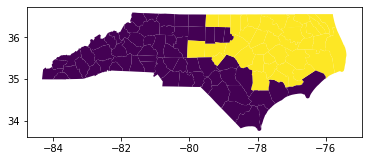

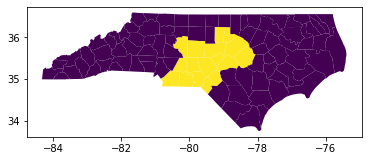

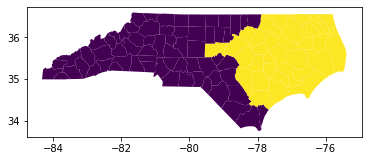

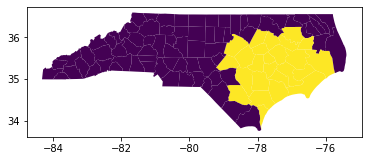

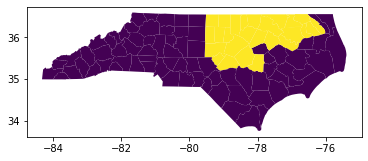

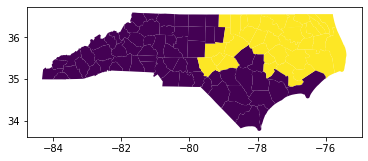

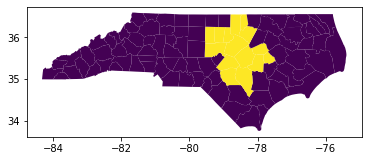

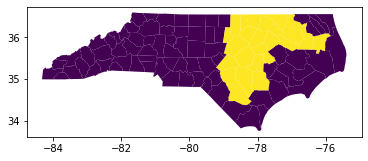

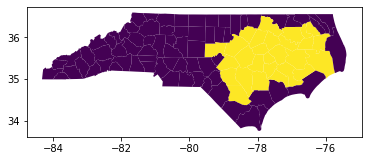

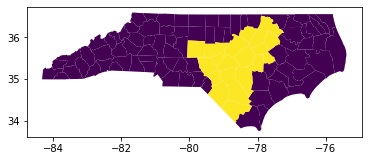

In [7]:
# Draw the districting plans
from cluster import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top 10 clusters are:")
for p in range(len(districts)):
    draw_single_district( filepath, filename, G, districts[p], zoom=False )